In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import my_functions as mf
from matplotlib.colors import LogNorm
from matplotlib import cm
from scipy.ndimage import gaussian_filter

In [2]:
%matplotlib inline

In [11]:
xmin = 1.
xmax = 110.
xn = 20
x = np.linspace(xmin,xmax,xn)

ymin = 1.
ymax = 110.
yn = 20
y = np.linspace(ymin,ymax,yn)

zmin = 1
zmax = 110
zn =  20
z = np.linspace(zmin,zmax,zn)

X,Y,Z = np.meshgrid(x,y,z)

#rho_m = (((X-5)*(X-5))+((Y-2)*(Y-2))+((Z-10)*(Z-10)))

rho_m = 7*X*Y*Z/(X**2 + Y**2 + Z**2)

In [20]:
xx,yy,zz,x1,y1,z1,rho = mf.select_area(1,110,1,110,1,120,x,y,z,rho_m)

In [21]:
rho1 = np.ravel(rho)
lx,ly,lz = rho.shape
print(lx,ly,lz)

19 19 19


In [25]:
x1min = np.min(x1)
y1min = np.min(y1)
z1min = np.min(z1)

x1max = np.max(x1)
y1max = np.max(y1)
z1max = np.max(z1)

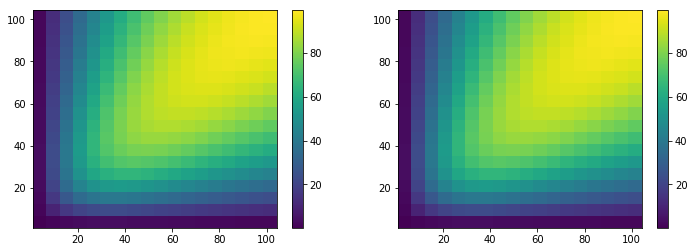

In [26]:
mx,my = np.meshgrid(y1,x1)
mx1,my1 = np.meshgrid(z1,y1)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.pcolor(mx,my,rho[:,:,5])
plt.colorbar()

plt.subplot(1,2,2)
plt.pcolor(my1,mx1,rho[5,:,:])

plt.colorbar()
plt.show()

In [33]:
# Control points

x1n = 25
y1n = 25
z1n = 25

c1 = np.linspace(xmin,xmax,x1n)+0.5
c2 = np.linspace(ymin,ymax,y1n)+0.5
c3 = np.linspace(zmin,zmax,z1n)+0.5

Xc,Yc,Zc = np.meshgrid(c1,c2,c3)


xc = np.ravel(Xc)
yc = np.ravel(Yc)
zc = np.ravel(Zc)

ln = xc.size

In [34]:
xc.size,yc.size,zc.size

(15625, 15625, 15625)

In [35]:
xx.size,yy.size,zz.size

(6859, 6859, 6859)

In [36]:
# Calculate interpolation function
t = 0.8
A = mf.calc_A_by_column(xx,yy,zz,xc,yc,zc,1,t)

In [45]:
H = np.dot(A,A.T)

In [46]:
h0 = np.trace(H)/ln

In [47]:
mu = 1E-8*h0
print( mu)

6.744029244898773e-05


In [54]:
w = np.linalg.solve(H,rho1)

In [55]:
p = np.dot(A.T,w)

In [57]:
# #Interpolation points

dx1 = (x1[1:]+x1[:-1])/2
dy1 = (y1[1:]+y1[:-1])/2
dz1 = (z1[1:]+z1[:-1])/2

x0n = len(dx1)
y0n = len(dy1)
z0n = len(dz1)

X0,Y0,Z0 = np.meshgrid(dx1,dy1,dz1)


x0 = np.ravel(X0)
y0 = np.ravel(Y0)
z0 = np.ravel(Z0)

rho_0real = 7*X0*Y0*Z0/(X0**2 + Y0**2 + Z0**2)

In [58]:
x0.size,y0.size,z0.size

(5832, 5832, 5832)

In [59]:
xc.size,yc.size,zc.size

(15625, 15625, 15625)

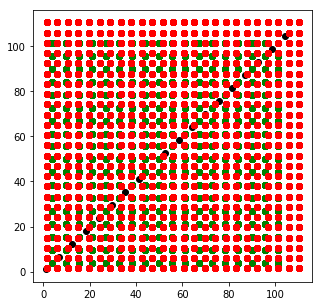

In [62]:
plt.figure(figsize=(5,5))
plt.plot(y1,x1,'ko')
plt.plot(y0,x0,'go')
plt.plot(yc,xc,'ro')

In [63]:
t = 0.8

In [64]:
# Interpolate funtion rho in points x0, y0, z0

A0 = mf.calc_A_by_column(x0,y0,z0,xc,yc,zc,1,t)

In [69]:
# Interpolated matrix
rho0 = np.dot(A0,p)
rho0_m = rho0.reshape((x0n,y0n,z0n))

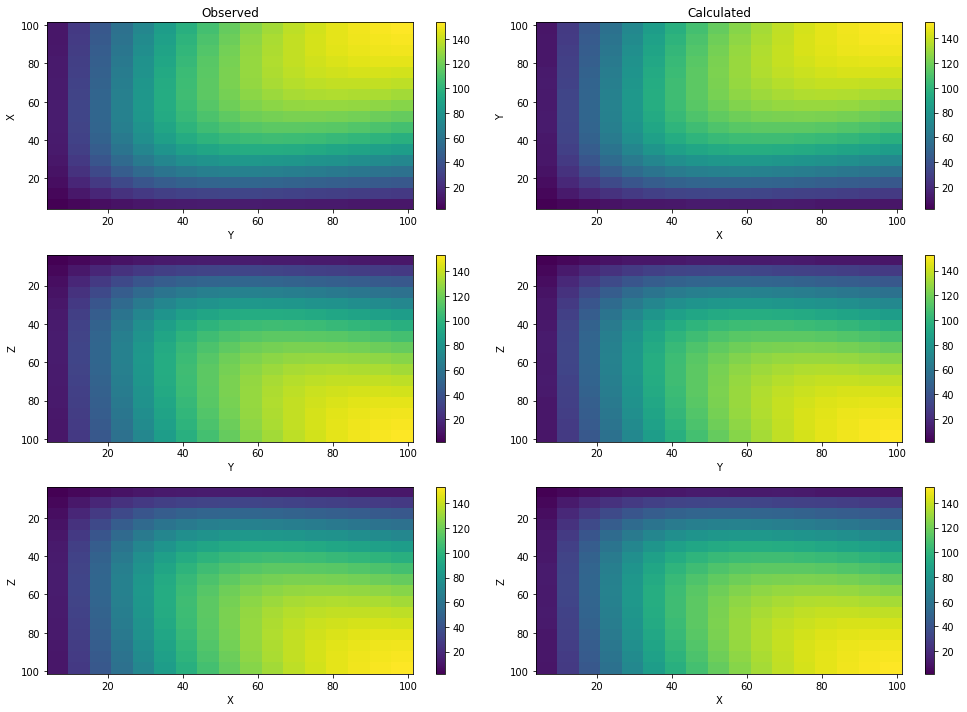

In [70]:
mf.plot_function_6sub(50,50,50,dx1,dy1,dz1,dx1,dy1,dz1,rho_0real,rho0_m)